In [66]:
import pandas as pd 
df=pd.read_csv("C:/Users/HP/Downloads/Education/Data Science/GUvI/projects/Capstone project 4 All Details A to Z/Amazon Music Clustering/single_genre_artists.csv")
df.info()
df.describe()
print("column:",df.columns)
print("no of duplicates:",df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [67]:
import pandas as pd 
df=pd.read_csv("C:/Users/HP/Downloads/Education/Data Science/GUvI/projects/Capstone project 4 All Details A to Z/Amazon Music Clustering/single_genre_artists.csv")
df.info()
df.describe()
print("column:",df.columns)
print("no of duplicates:",df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [68]:
cols_to_drop = [
    'id_songs', 'name_song', 'id_artists',
    'release_date', 'name_artists', 'genres'
]
df_clean = df.drop(columns=cols_to_drop)
df_reference = df[['id_songs', 'name_song', 'name_artists', 'genres']].copy()

In [69]:
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms'
]

In [70]:
df_features = df_clean[audio_features]

In [71]:
print("Shape of features dataset:", df_features.shape)
print("Columns used for clustering:", df_features.columns.tolist())
print("Summary statistics:")
print(df_features.describe())


Shape of features dataset: (95837, 10)
Columns used for clustering: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Summary statistics:


       danceability        energy      loudness   speechiness  acousticness  \
count  95837.000000  95837.000000  95837.000000  95837.000000  95837.000000   
mean       0.586853      0.541083    -10.157862      0.168832      0.458989   
std        0.155422      0.236304      4.748798      0.275417      0.330416   
min        0.000000      0.000020    -50.174000      0.000000      0.000000   
25%        0.488000      0.365000    -12.723000      0.034100      0.133000   
50%        0.605000      0.542000     -9.397000      0.046200      0.453000   
75%        0.700000      0.727000     -6.692000      0.103000      0.759000   
max        0.991000      1.000000      5.376000      0.968000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      95837.000000  95837.000000  95837.000000  95837.000000   
mean           0.082145      0.224916      0.574281    117.539870   
std            0.232440      0.185829      0.248126     30.190399   
min         

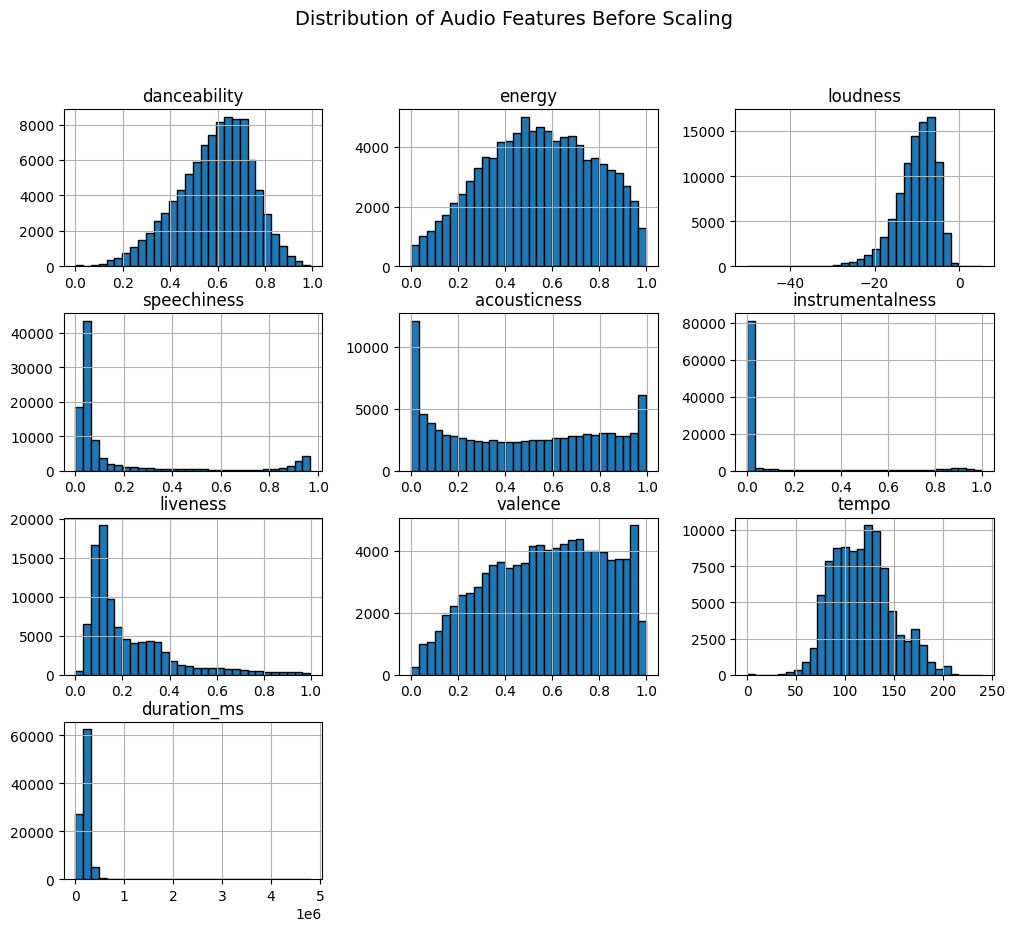

In [72]:
import matplotlib.pyplot as plt

df_features.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Audio Features Before Scaling", fontsize=14)
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(df_features),
    columns=df_features.columns
)

In [74]:
print("Summary statistics after Standard Scaling:")
print(df_standard_scaled.describe().T)

Summary statistics after Standard Scaling:
                    count          mean       std       min       25%  \
danceability      95837.0  2.704655e-16  1.000005 -3.775894 -0.636036   
energy            95837.0  7.592013e-17  1.000005 -2.289708 -0.745160   
loudness          95837.0  7.592013e-17  1.000005 -8.426626 -0.540169   
speechiness       95837.0 -7.592013e-17  1.000005 -0.613010 -0.489197   
acousticness      95837.0 -9.490016e-17  1.000005 -1.389130 -0.986605   
instrumentalness  95837.0  9.490016e-18  1.000005 -0.353405 -0.353405   
liveness          95837.0 -2.847005e-17  1.000005 -1.210346 -0.672214   
valence           95837.0  4.448445e-17  1.000005 -2.314486 -0.791058   
tempo             95837.0 -1.992903e-16  1.000005 -3.893307 -0.752259   
duration_ms       95837.0 -6.643011e-17  1.000005 -1.718520 -0.436503   

                       50%       75%        max  
danceability      0.116758  0.728001   2.600334  
energy            0.003880  0.786775   1.942075  
lou

C:\Users\HP\AppData\Local\Temp\ipykernel_2500\1875963864.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_standard_scaled.hist(ax=axes[0], bins=25, edgecolor='black')


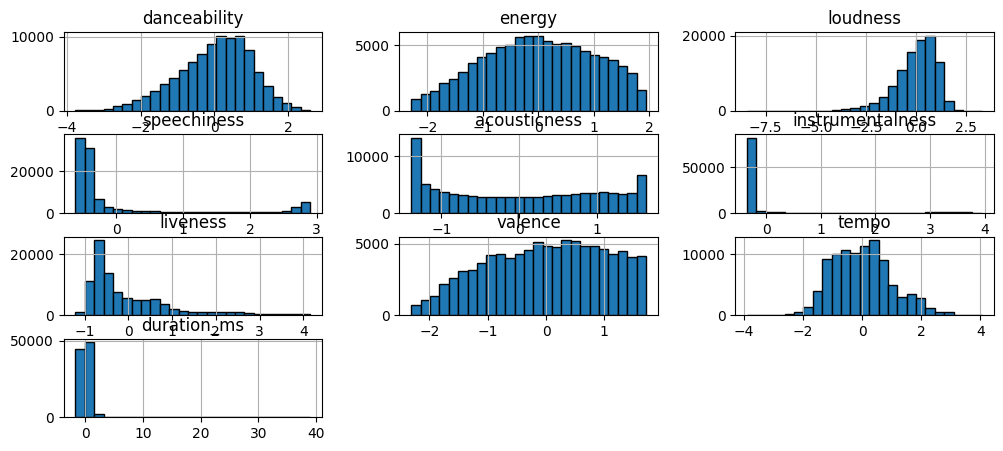

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_standard_scaled.hist(ax=axes[0], bins=25, edgecolor='black')
axes[0].set_title("After Standard Scaling")
plt.show()

Explained Variance by Each Principal Component:
  Principal Component  Explained Variance Ratio  Cumulative Variance
0                 PC1                  0.270796             0.270796
1                 PC2                  0.188214             0.459010
2                 PC3                  0.115536             0.574546
3                 PC4                  0.093634             0.668180
4                 PC5                  0.090168             0.758348
5                 PC6                  0.076807             0.835155
6                 PC7                  0.064152             0.899307
7                 PC8                  0.046249             0.945556
8                 PC9                  0.038531             0.984087
9                PC10                  0.015913             1.000000


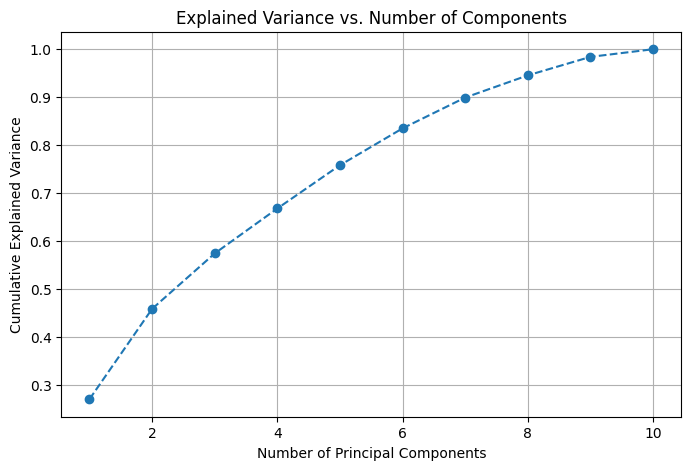

Shape after PCA Transformation: (95837, 9)


In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


pca = PCA(n_components=None)  
pca.fit(df_standard_scaled)


explained_variance = pca.explained_variance_ratio_


pca_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': explained_variance.cumsum()
})

print("Explained Variance by Each Principal Component:")
print(pca_variance_df)


plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variance vs. Number of Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_standard_scaled)

print("Shape after PCA Transformation:", df_pca.shape)


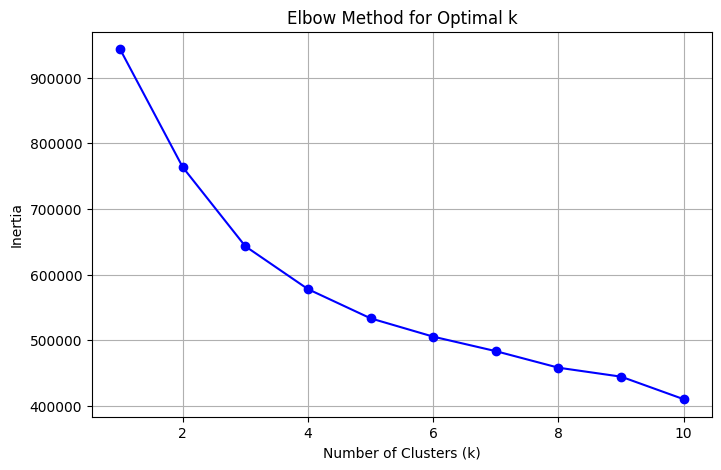


Cluster Distribution:
Cluster
2    46394
3    29166
1    12409
0     7868
Name: count, dtype: int64

Sample songs from each cluster:

Cluster 0:
                           name_song                    name_artists  \
53  Veux Tu Que J'te Fasse Un Dessin                        Georgius   
65                    West End Blues  Louis Armstrong & His Hot Five   
67                     Beau Koo Jack  Louis Armstrong & His Hot Five   
69                  Gut Bucket Blues  Louis Armstrong & His Hot Five   
70                   Skid-Dat-De-Dat  Louis Armstrong & His Hot Five   

                  genres  
53   ['vintage chanson']  
65  ['new orleans jazz']  
67  ['new orleans jazz']  
69  ['new orleans jazz']  
70  ['new orleans jazz']  

Cluster 1:
                        name_song name_artists               genres
37            Dites Moi Doumergue    Perchicot  ['vintage chanson']
43      Il N'osait Pas Se Decider     Georgius  ['vintage chanson']
50            L'amour Excuse Tout     Georg

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

k_optimal = 4

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(df_pca)


df_reference['Cluster'] = kmeans.labels_

print("\nCluster Distribution:")
print(df_reference['Cluster'].value_counts())

print("\nSample songs from each cluster:")
for i in range(k_optimal):
    print(f"\nCluster {i}:")
    print(df_reference[df_reference['Cluster'] == i][['name_song', 'name_artists', 'genres']].head(5))


In [78]:
import pandas as pd

df_pca_df = pd.DataFrame(df_pca)

df_clustered = pd.concat([pd.DataFrame(df_standard_scaled, columns=df_features.columns), 
                          pd.Series(kmeans.labels_, name='Cluster')], axis=1)

cluster_profile = df_clustered.groupby('Cluster').mean().round(3)
print(cluster_profile)


         danceability  energy  loudness  speechiness  acousticness  \
Cluster                                                              
0              -0.654  -0.530    -0.801       -0.395         0.568   
1               0.498  -0.314    -0.681        2.417         0.384   
2               0.307   0.704     0.578       -0.333        -0.657   
3              -0.525  -0.843    -0.413       -0.392         0.729   

         instrumentalness  liveness  valence  tempo  duration_ms  
Cluster                                                           
0                   3.133    -0.196   -0.501 -0.107        0.193  
1                  -0.349     1.132    0.036 -0.571       -0.950  
2                  -0.263    -0.128    0.448  0.257        0.135  
3                  -0.278    -0.225   -0.593 -0.137        0.137  


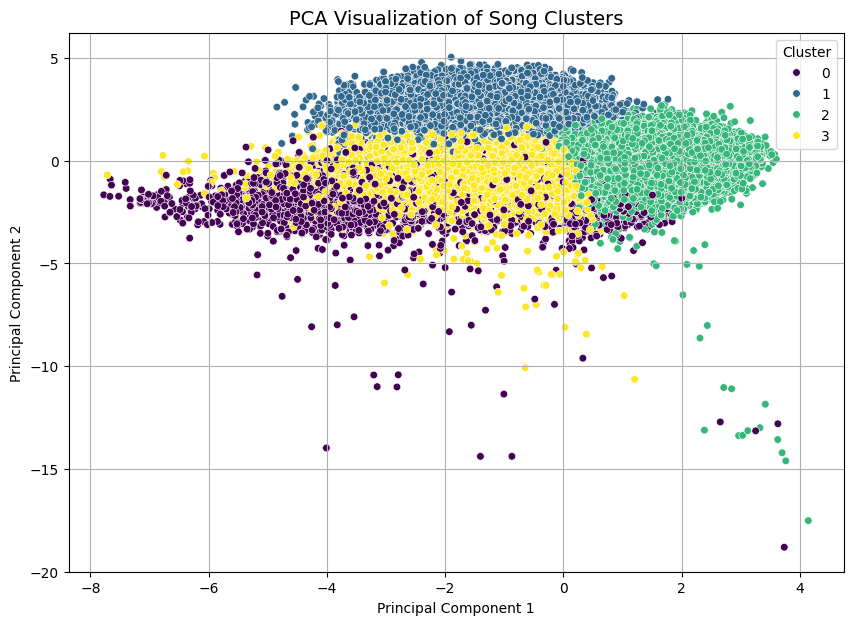

In [79]:
import seaborn as sns
pca_df = pd.DataFrame(df_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_


plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=30)
plt.title("PCA Visualization of Song Clusters", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

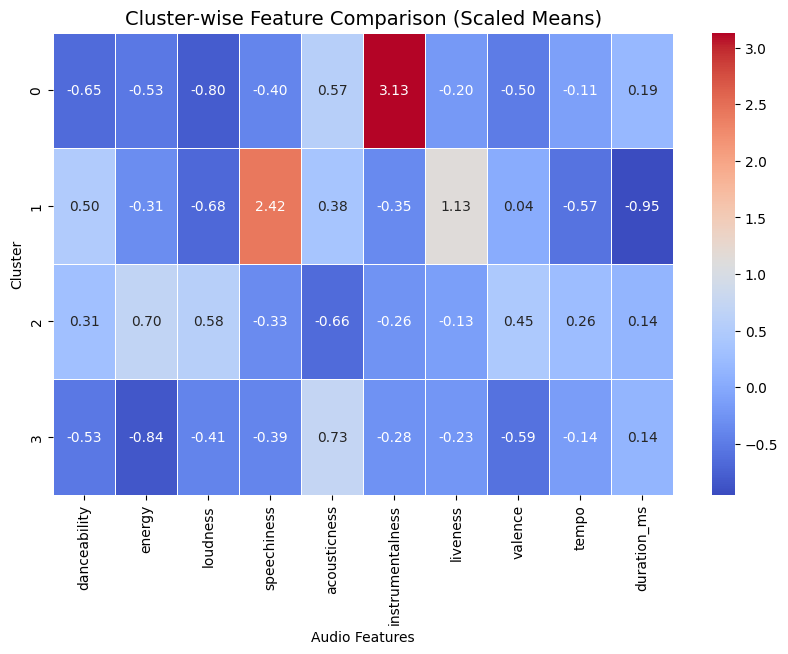

In [80]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Cluster-wise Feature Comparison (Scaled Means)", fontsize=14)
plt.xlabel("Audio Features")
plt.ylabel("Cluster")
plt.show()

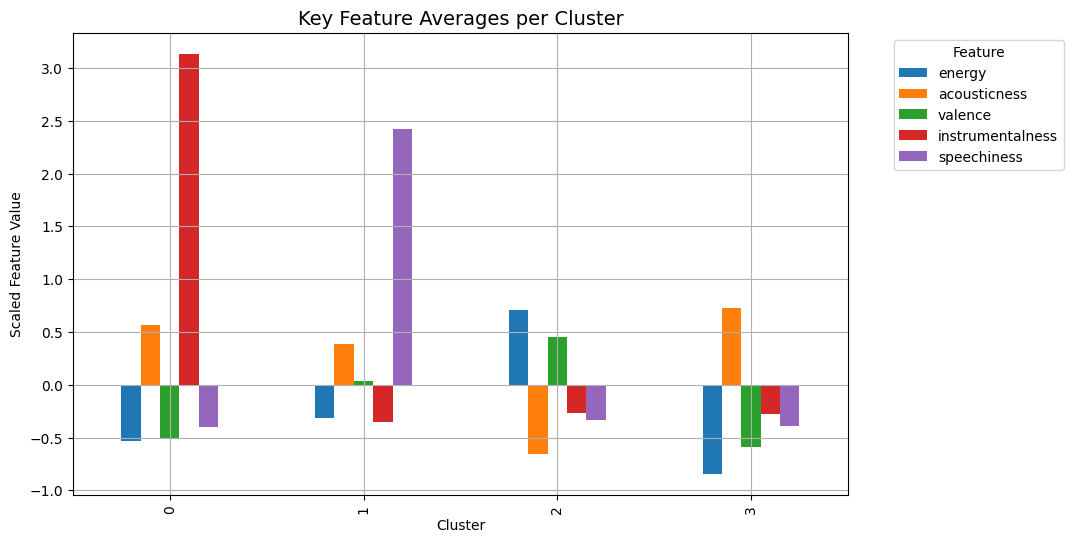

In [81]:
features_to_compare = ['energy', 'acousticness', 'valence', 'instrumentalness', 'speechiness']
cluster_profile[features_to_compare].plot(kind='bar', figsize=(10,6))
plt.title("Key Feature Averages per Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Scaled Feature Value")
plt.grid(True)
plt.legend(title="Feature", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [82]:
feature_columns = ['danceability','energy','loudness','speechiness',
                   'acousticness','instrumentalness','liveness','valence','tempo','duration_ms']

df_export = df_final[['id_songs', 'name_song', 'name_artists', 'genres', 'Cluster'] + feature_columns]


In [83]:
df_export.to_csv("AmazonMusic_Clustered.csv", index=False)
print("Exported final dataset with cluster labels successfully!")

Exported final dataset with cluster labels successfully!


In [84]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_pca, kmeans.labels_)
print("Silhouette Score:", round(sil_score, 4))


Silhouette Score: 0.236


In [85]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(df_pca, kmeans.labels_)
print("Davies-Bouldin Index:", round(db_index, 4))


Davies-Bouldin Index: 1.508


In [86]:
with open("cleaned_data.pkl", "wb") as f:
    pickle.dump({
        "df_reference": df_reference,
        "df_standard_scaled": df_standard_scaled,
        "df_pca": df_pca,
        "kmeans_labels": kmeans.labels_,
        "cluster_profile": cluster_profile,
        "feature_columns": feature_columns,
        "sil_score": sil_score,         
        "db_index": db_index            
    }, f)
